# Filter study for Cryoscope

**Goal**: find *correct* predistortion filters to apply to flux impulse

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

from cryoscope_scripts import _fit, load_cryoscope_data, compute_window_length, save_fit_data
from qibocal.protocols.two_qubit_interaction.cryoscope import CryoscopeData 

FULL_WAVEFORM = np.concatenate([np.zeros(10), np.ones(50), np.zeros(10)])

In [7]:
def build_phase(time, c, start, noise: bool):
    phase = []
    for t in time:
        phi = c if t<start else 0.015*(t - start) + c

        if noise:
            phi += np.random.normal(loc=0, scale=0.005)  
       
        phase.append(phi)

    return phase

In [8]:
time = np.arange(0,60,1)
c = -np.pi/8
start = 10

phase = build_phase(time, c, start, False)
print(phase)

[-0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.39269908169872414, -0.3776990816987241, -0.3626990816987241, -0.34769908169872416, -0.33269908169872414, -0.31769908169872413, -0.30269908169872417, -0.28769908169872416, -0.27269908169872414, -0.25769908169872413, -0.24269908169872415, -0.22769908169872416, -0.21269908169872415, -0.19769908169872413, -0.18269908169872415, -0.16769908169872416, -0.15269908169872415, -0.13769908169872414, -0.12269908169872412, -0.10769908169872416, -0.09269908169872415, -0.07769908169872414, -0.06269908169872418, -0.047699081698724166, -0.03269908169872415, -0.01769908169872414, -0.002699081698724126, 0.012300918301275832, 0.027300918301275845, 0.04230091830127586, 0.057300918301275816, 0.07230091830127583, 0.08730091830127584, 0.10230091830127586, 0.11730091830127587, 0.132300918301

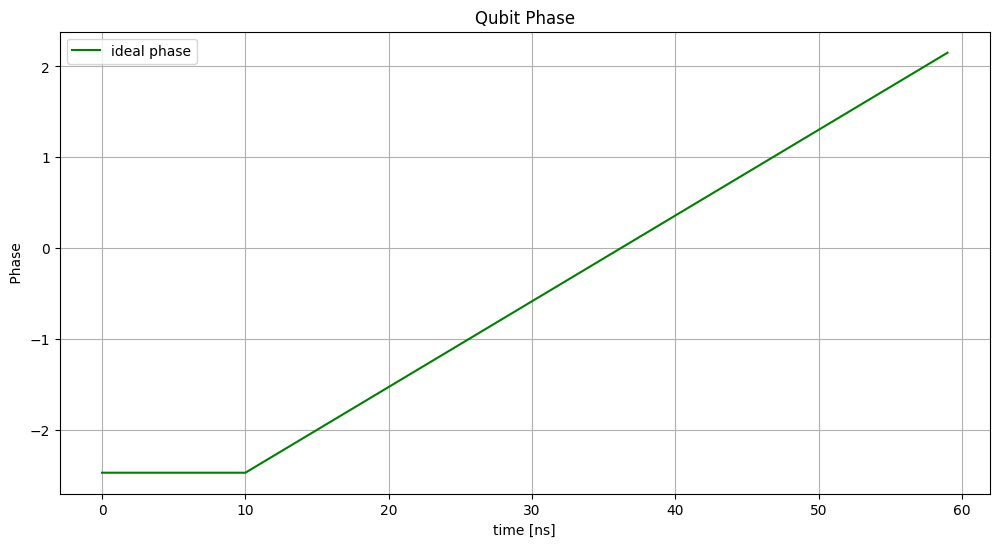

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(phase, color="green", label="ideal phase")
plt.xlabel("time [ns]")
plt.ylabel(" Phase ")
plt.title("Qubit Phase")
plt.legend()
plt.grid()
plt.show()

In [10]:
phase = np.array(phase)*2*np.pi

raw_detuning = scipy.signal.savgol_filter(
    phase / (2 * np.pi),
    window_length=3,
    polyorder=2,
    deriv=1,
)

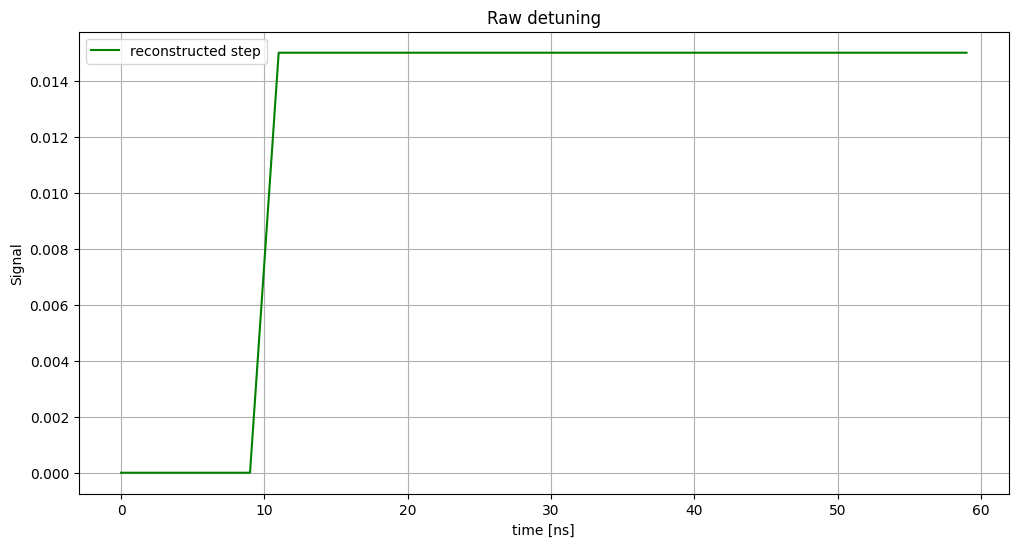

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(raw_detuning, color="green", label="reconstructed step")
plt.xlabel("time [ns]")
plt.ylabel("Signal")
plt.title("Raw detuning")
plt.legend()
plt.grid()
plt.show()

In [8]:
time = np.arange(0, 60, 1)
c = -np.pi / 8
start = 10

phase = build_phase(time, c, start, True)

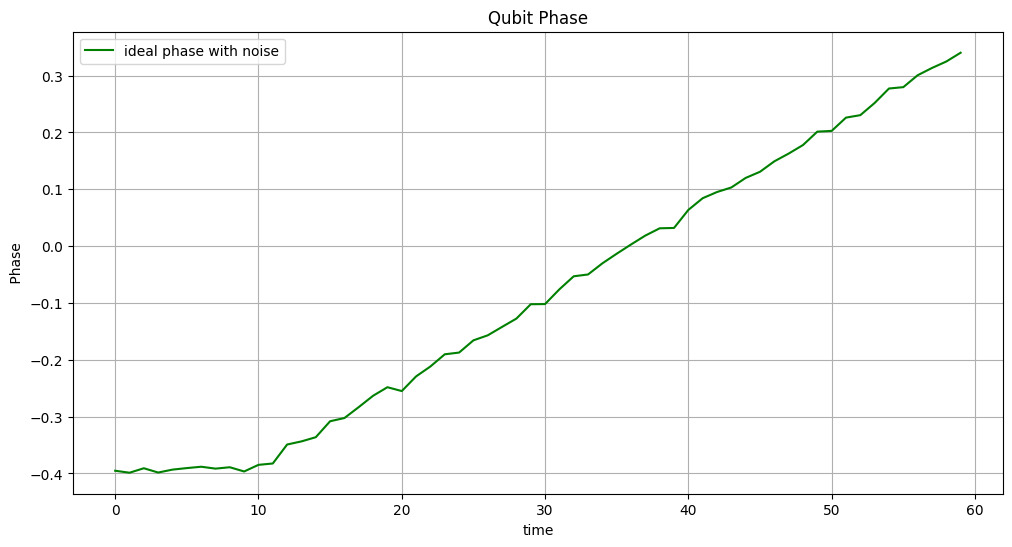

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(phase, color="green", label="ideal phase with noise")
plt.xlabel("time")
plt.ylabel(" Phase ")
plt.title("Qubit Phase")
plt.legend()
plt.grid()
plt.show()

In [63]:
phase = np.array(phase) * 2 * np.pi

raw_detuning = scipy.signal.savgol_filter(
    phase / (2 * np.pi),
    window_length=3,
    polyorder=2,
    deriv=1,
)

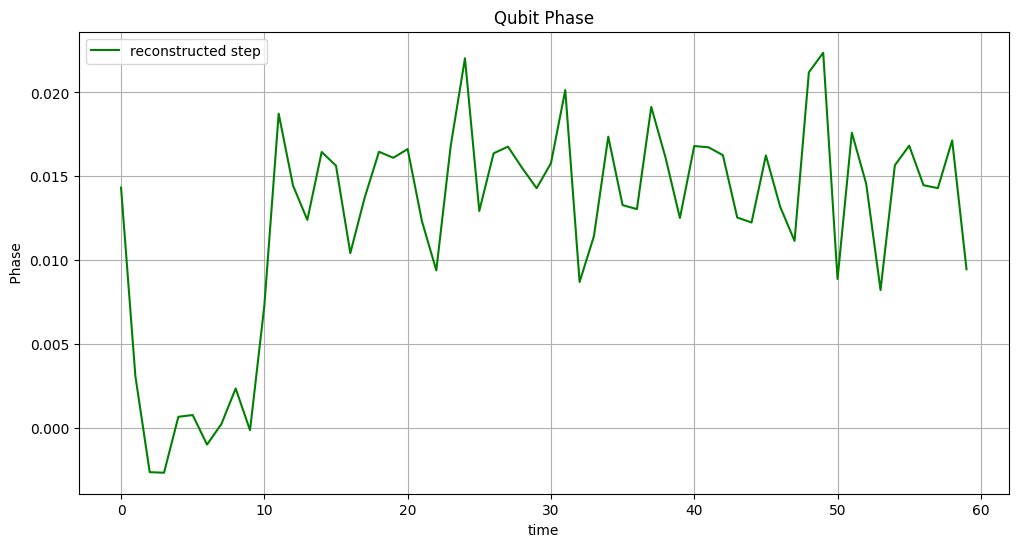

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(raw_detuning, color="green", label="reconstructed step")
plt.xlabel("time")
plt.ylabel(" Phase ")
plt.title("Qubit Phase")
plt.legend()
plt.grid()
plt.show()